In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline

from pandas import set_option
set_option("display.max_rows", 16)
LARGE_FIGSIZE = (20,12)

In [4]:
/Users/jimdoone/Desktop/Multiple_Linear/Multiple_Linear_Regression\ 2/50_Starups.csv 

SyntaxError: invalid syntax (<ipython-input-4-ae1806ff0b58>, line 1)

In [6]:
#%cd /Users/jimdoone/Desktop/
%ls

50_Startups.csv
Desktop/
Housing.xlsx
Icon?
Jobs/
PVPMC/
Python/
SCREEN_SHOTS/
file.xls
machine/
pandas_data_files/
~$E POSITION .docx
~$EDExercise 1 Simple Project Finance Model.xlsm
~$Excel2013StatisticsChapter07.xlsm
~$Fred_2013.xlam
~$HCA.xlsx
~$P90, P99 etc Analysis.xlsx
~$Python.docx
~$Read PDF to Excel.xlsm
~$Risk_2.xlsx
~$Solar Model Version 3.xlsm
~$anddo_Excel_notes.docx
~$ats_notes.docx
~$ergy Primer.docx
~$mes_Doone_Alcen_CL.docx
~$mes_Doone_Tesla.docx
~$n_Leffern__Mark_20150227 (1).docx
~$oone_CSE_CL.docx
~$oone_Duq.docx
~$rect Current Transmission Lines.docx


In [4]:
%cd Desktop/

/Users/jimdoone/Desktop


In [24]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,"165,349","136,898","471,784",New York,"192,262"
1,"162,598","151,378","443,899",California,"191,792"


In [25]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

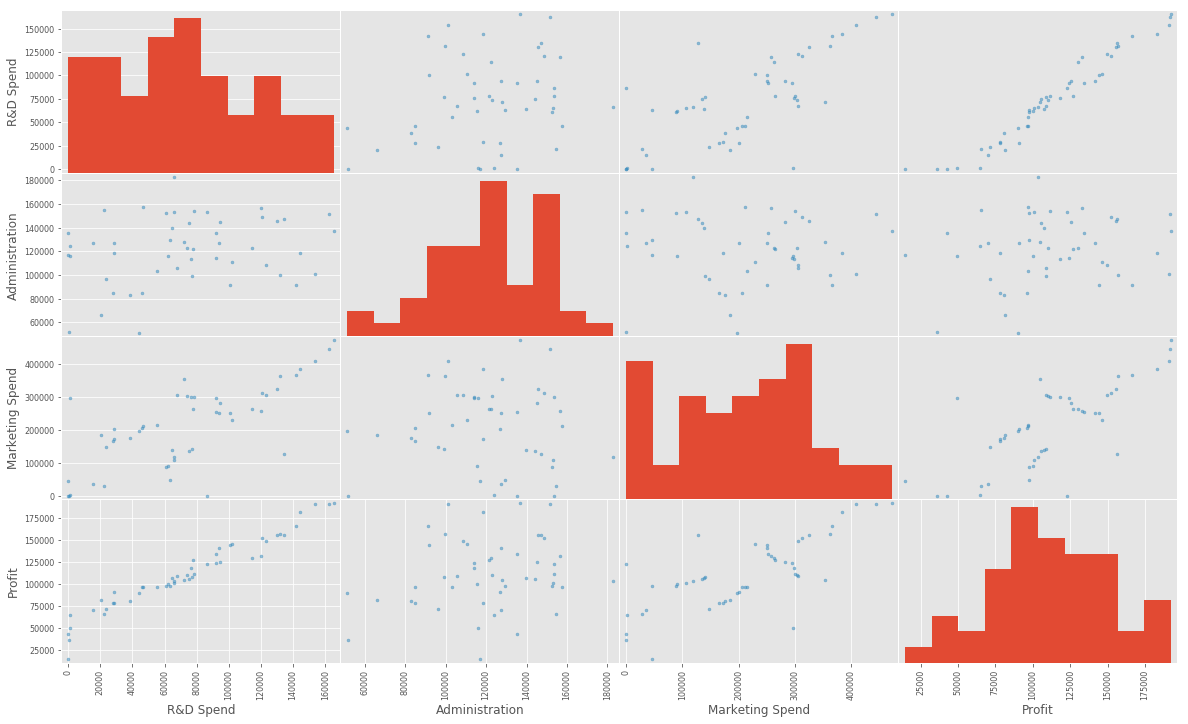

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, figsize=LARGE_FIGSIZE);

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [27]:
pd.DataFrame(X).head()

,0,1,2,3
0,"165,349","136,898","471,784",New York
1,"162,598","151,378","443,899",California
2,"153,442","101,146","407,935",Florida
3,"144,372","118,672","383,200",New York
4,"142,107","91,392","366,168",Florida


In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,-1] = labelencoder.fit_transform(X[:,-1])

In [29]:
pd.DataFrame(X).head()

,0,1,2,3
0,"165,349","136,898","471,784",2
1,"162,598","151,378","443,899",0
2,"153,442","101,146","407,935",1
3,"144,372","118,672","383,200",2
4,"142,107","91,392","366,168",1


In [30]:
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

In [31]:
pd.DataFrame(X).head(2)

,0,1,2,3,4,5
0,0,0,1,"165,349","136,898","471,784"
1,1,0,0,"162,598","151,378","443,899"


In [32]:
X = X[:, 1:]
pd.DataFrame(X).head(2)

,0,1,2,3,4
0,0,1,"165,349","136,898","471,784"
1,0,0,"162,598","151,378","443,899"


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred = regressor.predict(X_test)


In [36]:
pd.options.display.float_format = '{:,.0f}'.format
pd.DataFrame({'error': abs(y_pred - y_test), 'profit_pred': y_pred, 'profit': y_test})

,error,profit,profit_pred
0,267,"103,282","103,015"
1,"11,677","144,259","132,582"
2,"13,674","146,122","132,448"
3,"5,823","77,799","71,976"
4,"12,513","191,050","178,537"
5,"11,153","105,008","116,161"
6,"13,377","81,229","67,852"
7,"1,308","97,484","98,792"
8,"3,617","110,352","113,969"
9,"1,733","166,188","167,921"


In [37]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((50,1)).astype(int), values =X, axis=1)

In [38]:
def backwardElimination(x, sl):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float)==maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
        
    

In [39]:
X.shape

(50, 6)

In [40]:
#Significance level
SL = 0.05
X_OPT = X[:, [0,1,2,3,4,5]]
X_Modeled = backwardElimination(X_OPT, SL)

In [74]:
pd.DataFrame(X_Modeled).head()

,0,1
0,1,"165,349"
1,1,"162,598"
2,1,"153,442"
3,1,"144,372"
4,1,"142,107"


In [41]:
regressor_OLS = sm.OLS(endog=y, exog=X_OPT).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 08 Jun 2017   Prob (F-statistic):           1.34e-27
Time:                        13:10:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
regressor_OLS = sm.OLS(endog=y, exog=X_Modeled).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 08 Jun 2017   Prob (F-statistic):           3.50e-32
Time:                        13:08:24   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regress proft on RD Spending

In [78]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,"165,349","136,898","471,784",New York,"192,262"
1,"162,598","151,378","443,899",California,"191,792"


In [83]:
X_rd = dataset.iloc[:, :-4].values
y_rd = dataset.iloc[:, -1].values

In [84]:
pd.DataFrame(X_rd).head(5)

,0
0,"165,349"
1,"162,598"
2,"153,442"
3,"144,372"
4,"142,107"


In [85]:
pd.DataFrame(y_rd).head(5)

,0
0,"192,262"
1,"191,792"
2,"191,050"
3,"182,902"
4,"166,188"


In [86]:
from sklearn.model_selection import train_test_split
Xrd_train, Xrd_test, yrd_train, yrd_test = train_test_split(X_rd, y_rd, test_size = 0.2, random_state = 0)



In [87]:
from sklearn.linear_model import LinearRegression
regressor_rd = LinearRegression()
regressor_rd.fit(Xrd_train, yrd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
yrd_pred = regressor_rd.predict(Xrd_test)

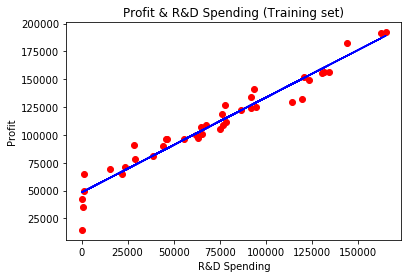

In [89]:
plt.scatter(Xrd_train, yrd_train, color = 'red')
plt.plot(Xrd_train, regressor_rd.predict(Xrd_train), color = 'blue')
plt.title('Profit & R&D Spending (Training set)')
plt.xlabel('R&D Spending')
plt.ylabel('Profit')
plt.show()

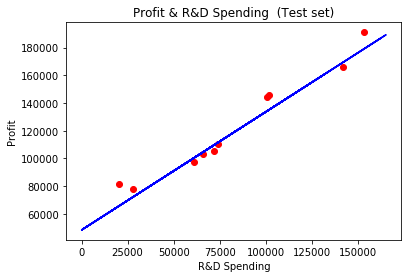

In [90]:
plt.scatter(Xrd_test, yrd_test, color = 'red')
plt.plot(Xrd_train, regressor_rd.predict(Xrd_train), color = 'blue')
plt.title('Profit & R&D Spending  (Test set)')
plt.xlabel('R&D Spending')
plt.ylabel('Profit')
plt.show()